/tmp/ipykernel_89252/89245298.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  original_viridis = plt.cm.get_cmap('viridis')


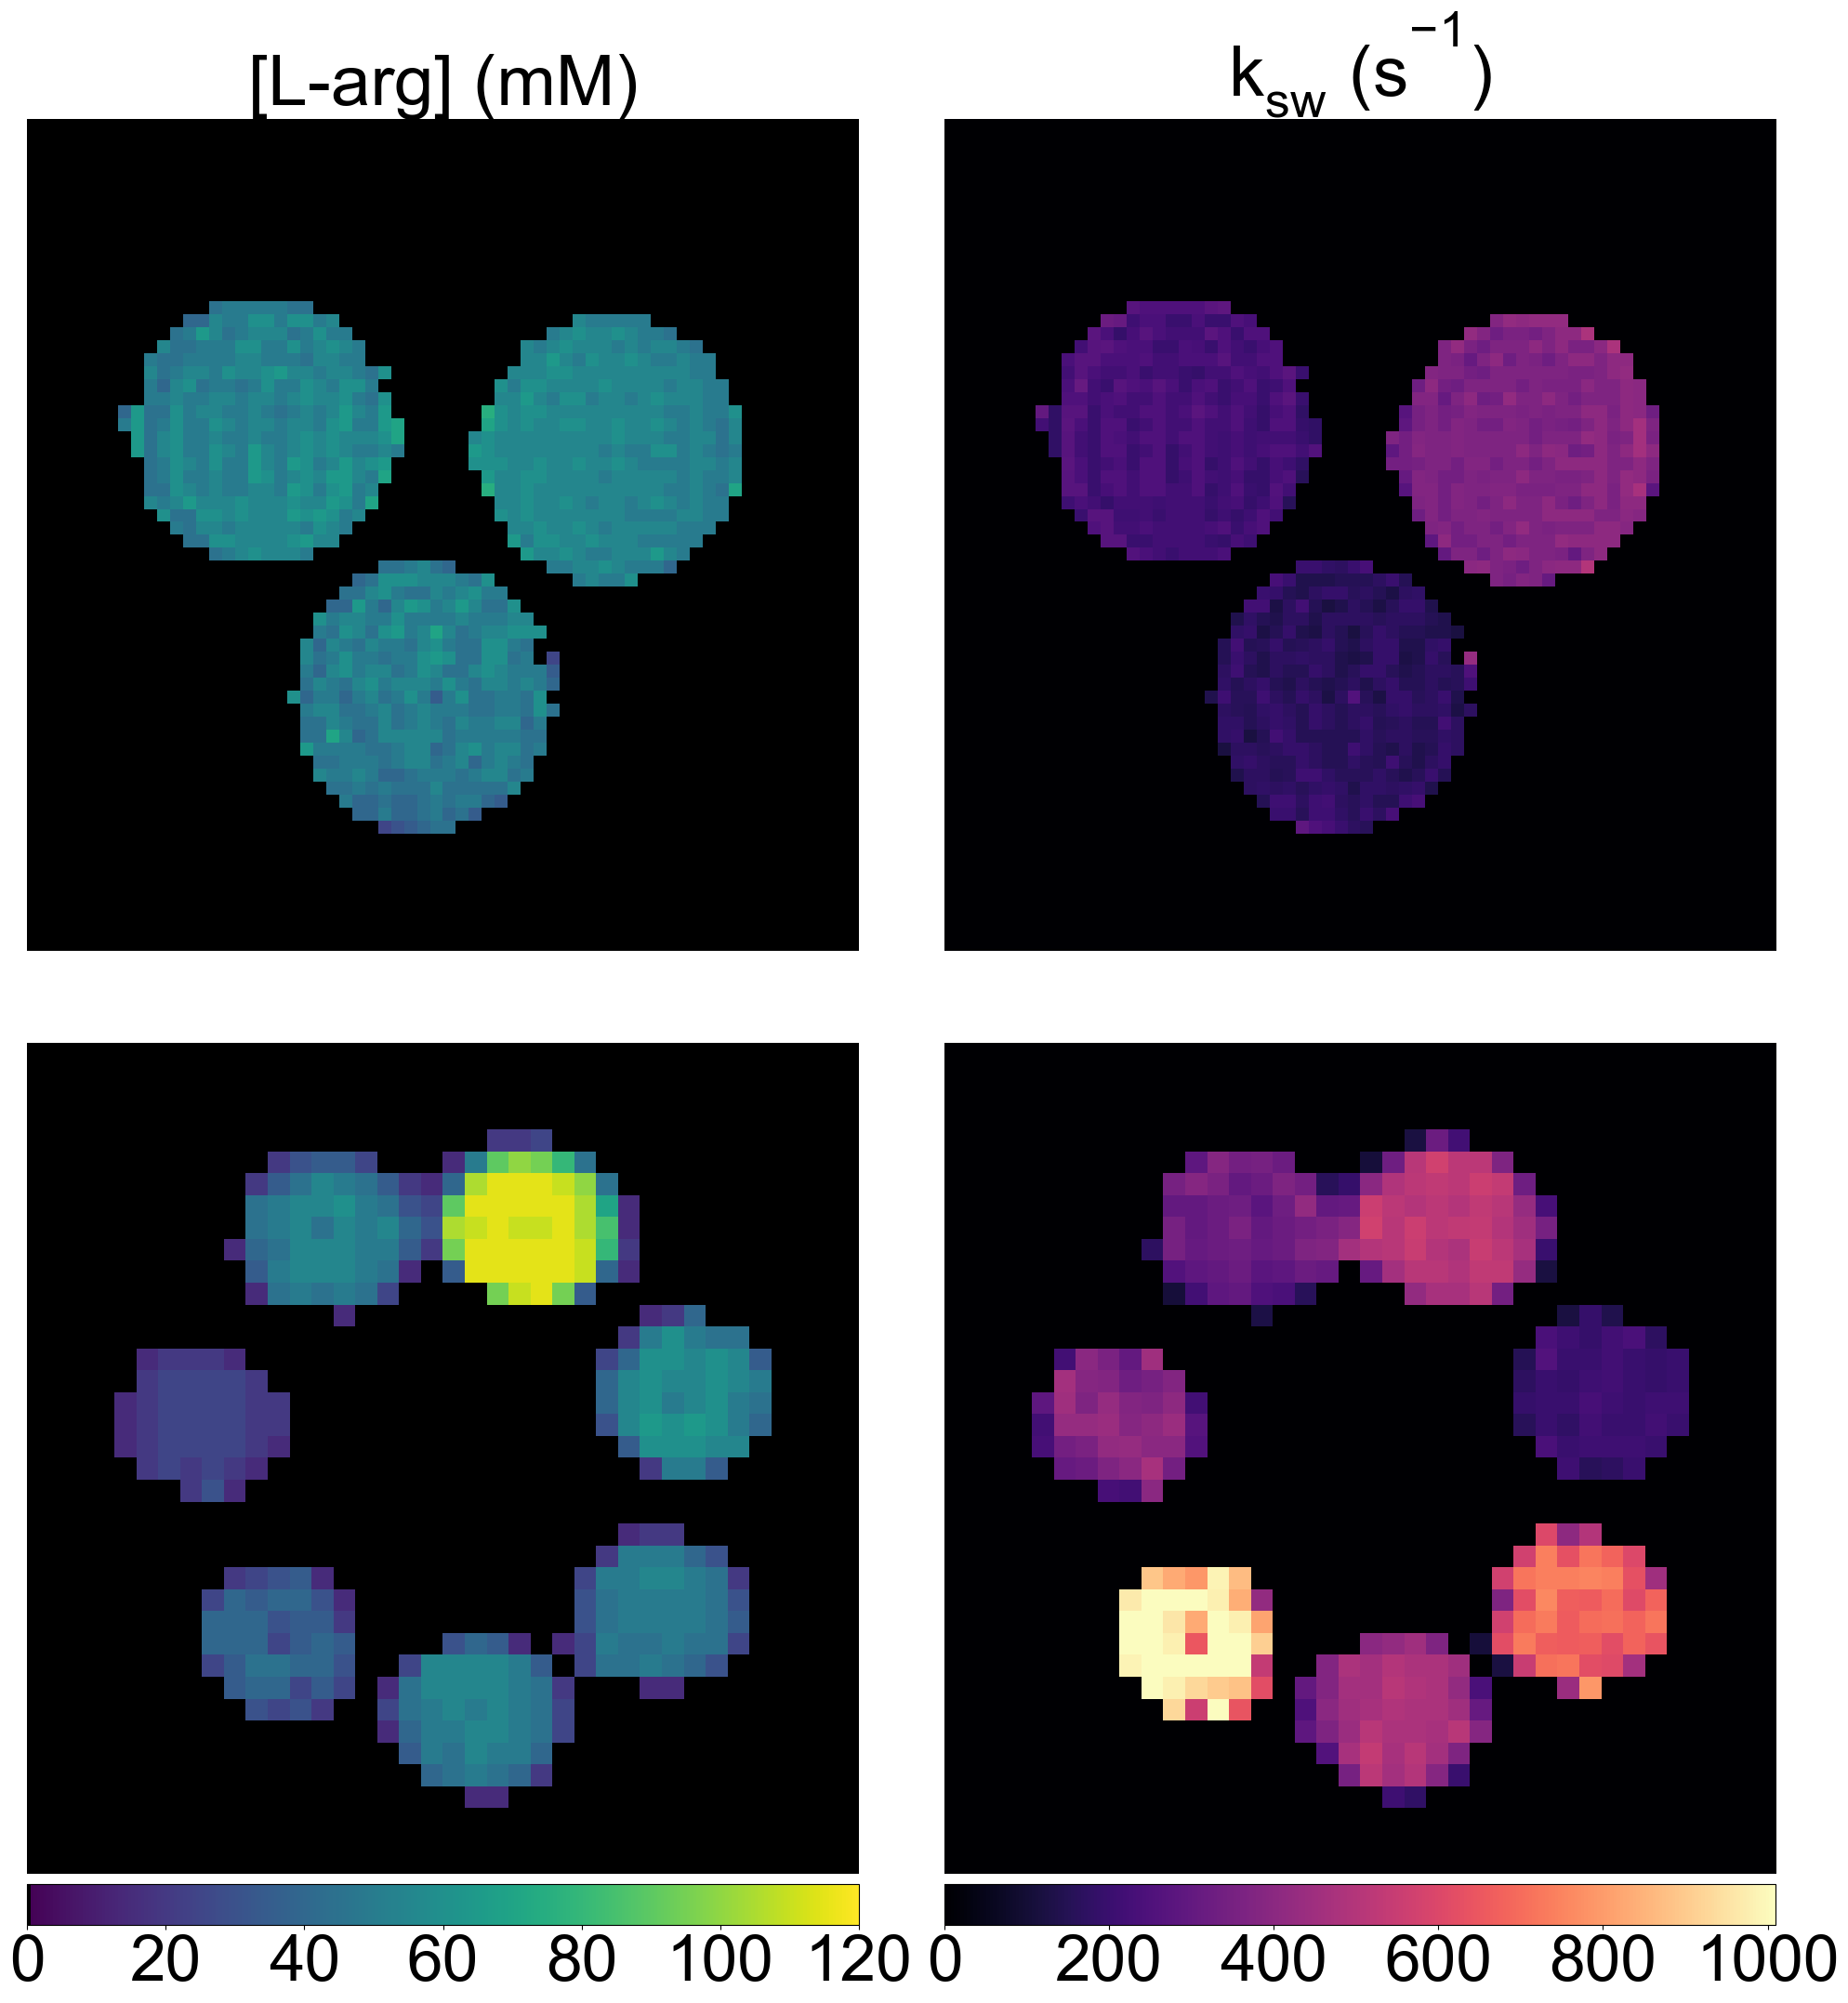

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages
import scipy.io as sio

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'custom' 
plt.rcParams['mathtext.rm'] = 'Arial' 
plt.rcParams['mathtext.it'] = 'Arial' 
plt.rcParams['mathtext.bf'] = 'Arial:bold'
# Function to modify the viridis colormap to start with black
def create_black_viridis():
    original_viridis = plt.cm.get_cmap('viridis')
    colors = original_viridis(np.arange(original_viridis.N))
    colors[0, :3] = 0  # Set the lowest value to black
    return mcolors.LinearSegmentedColormap.from_list('black_viridis', colors)

# Load data and masks
quant_maps7 = sio.loadmat('results/quant_maps.mat')
quant_maps = sio.loadmat('results/quant_maps_3T.mat')

for k,v in quant_maps.items():
    if k not in ['__header__', '__version__', '__globals__']:
        quant_maps[k] = v[15:-15, 15:-15]

# Combine masks for more refined visualization
mask_pre = quant_maps7['dp'] > 0.99974
mask_dp = quant_maps['dp'] > 0.9995
mask_ksw = quant_maps['ksw'] > 100
mask_fs = quant_maps['fs'] * 110e3 / 3 > 10
mask = mask_ksw & mask_dp & mask_fs  # Combined mask

# Create a black-start viridis colormap
b_viridis = create_black_viridis()

fig_fn = r'results/dot_product_results_both'

fig, axs = plt.subplots(2, 2, figsize=(20, 22))
fig.subplots_adjust(wspace=0.01, hspace=0.0001)  # Remove spacing between subplots

data_info = [
    (quant_maps7['fs'] * 110e3 / 3 * mask_pre, b_viridis, '[L-arg] (mM)', np.arange(0, 140, 20), (0, 120)),
    (quant_maps7['ksw'] * mask_pre, 'magma', 'k$_{sw}$ (s$^{-1}$)', np.arange(0, 1000+100, 200), (0, 1010)),
    (quant_maps['fs'] * 110e3 / 3 * mask, b_viridis, '', np.arange(0, 140, 20), (0, 120)),
    (quant_maps['ksw'] * mask, 'magma', '', np.arange(0, 1000 + 100, 200), (0, 1010)),
]

for i, (ax, (data, cmap, title, ticks, clim)) in enumerate(zip(axs.flat, data_info)):
    im = ax.imshow(data, cmap=cmap)
    im.set_clim(*clim)
    if title:
        ax.set_title(title, fontsize=55)
    ax.set_axis_off()
    if i > 1:
        orientation = 'horizontal'
        cb = fig.colorbar(im, ax=ax, orientation=orientation, ticks=ticks, pad=0.01, fraction=0.05)
        cb.ax.tick_params(labelsize=50)

plt.tight_layout()
plt.savefig(fig_fn+'.eps', format="eps")
plt.savefig(fig_fn+'.pdf', format="pdf")

In [6]:
fig_fn

'results/dot_product_results_both.eps'

In [5]:
print("Demonstrating the general content and structure of the quant_maps:")
quant_maps

Demonstrating the general content and structure of the quant_maps:


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Aug  1 17:18:54 2024',
 '__version__': '1.0',
 '__globals__': [],
 'dp': array([[0.99988862, 0.99989147, 0.99985695, ..., 0.99989436, 0.99991982,
         0.99989147],
        [0.99988993, 0.99988668, 0.99986693, ..., 0.99987518, 0.99989689,
         0.99987514],
        [0.99988679, 0.99988368, 0.99988296, ..., 0.99990285, 0.99991342,
         0.9999053 ],
        ...,
        [0.99990883, 0.999885  , 0.99987563, ..., 0.99990785, 0.99991829,
         0.99992201],
        [0.99987307, 0.99986023, 0.99990072, ..., 0.99992425, 0.99991713,
         0.99993761],
        [0.99987593, 0.99986222, 0.9998756 , ..., 0.99991981, 0.99992833,
         0.99993263]]),
 't1w': array([[2.7, 2.7, 2.8, ..., 2.7, 2.7, 2.7],
        [2.7, 2.7, 2.8, ..., 2.7, 2.7, 2.7],
        [2.8, 2.7, 2.7, ..., 2.7, 2.8, 2.7],
        ...,
        [2.8, 2.7, 2.7, ..., 2.9, 2.9, 2.9],
        [2.7, 2.7, 2.7, ..., 2.9, 2.9, 2.8],
        [2.7, 2.7, 2.8